In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('../StudentsPerformance.csv')

print(df.columns)
print(df.shape)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
(1000, 8)


In [2]:
print("Пропуски в даних:\n", df.isnull().sum())

numerical_cols = ['math score', 'reading score', 'writing score']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Пропуски після заповнення:\n", df.isnull().sum())

Пропуски в даних:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Пропуски після заповнення:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


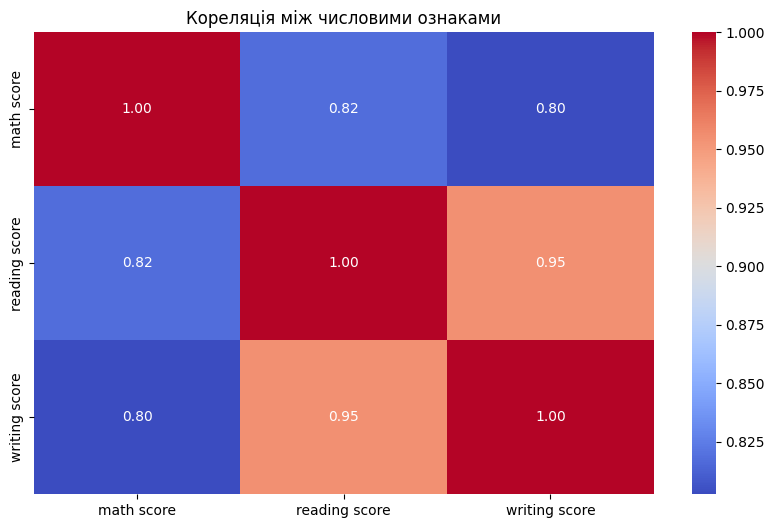

In [3]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Кореляція між числовими ознаками')
plt.show()

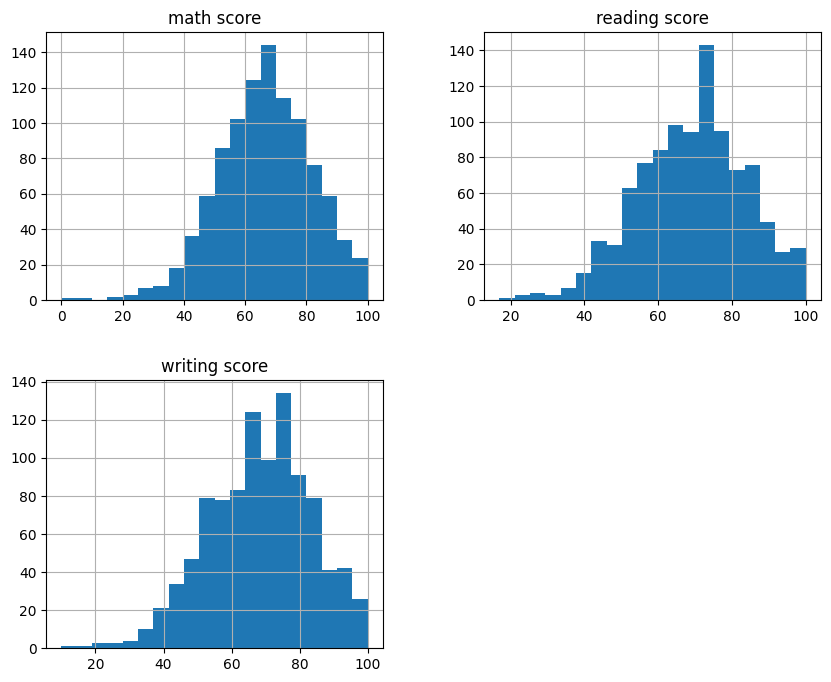

In [4]:
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.show()

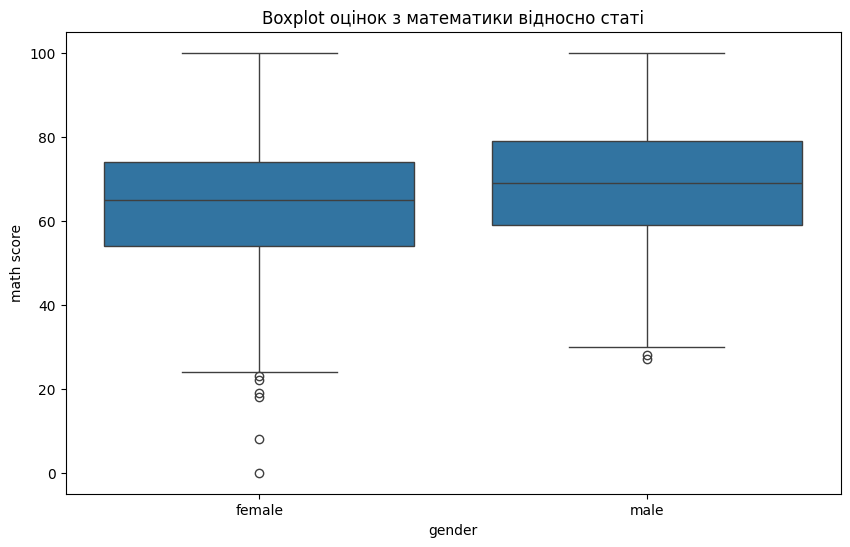

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Boxplot оцінок з математики відносно статі')
plt.show()

In [6]:
X = pd.get_dummies(df[categorical_cols + numerical_cols], drop_first=True)

df['mean_score'] = df[numerical_cols].mean(axis=1)
median_score = df['mean_score'].median()
df['target'] = (df['mean_score'] >= median_score).astype(int)

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# k-Nearest Neighbors (kNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

# Підбір параметра для kNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_scaled, y_train)
print("Найкращий параметр для kNN:", grid_knn.best_params_)

KNN Classification Report
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       154
           1       0.87      0.90      0.89       146

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

KNN Confusion Matrix
[[134  20]
 [ 14 132]]
Найкращий параметр для kNN: {'n_neighbors': 9}


In [8]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       154
           1       0.98      0.96      0.97       146

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Decision Tree Confusion Matrix
[[151   3]
 [  6 140]]


In [9]:
# SVM
svm = SVC()
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       154
           1       0.95      0.95      0.95       146

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

SVM Confusion Matrix
[[146   8]
 [  8 138]]


In [10]:
# Підбір параметрів для SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_scaled, y_train)
print("Найкращі параметри для SVM:", grid_svm.best_params_)

Найкращі параметри для SVM: {'C': 10, 'gamma': 0.01}


In [11]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       154
           1       0.99      0.95      0.97       146

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Random Forest Confusion Matrix
[[153   1]
 [  7 139]]


In [12]:
# AdaBoost
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)

print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ada))
print("AdaBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ada))

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       154
           1       0.99      0.97      0.98       146

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

AdaBoost Confusion Matrix
[[153   1]
 [  5 141]]
